In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
plt.style.use("seaborn-v0_8")
sns.set_palette("muted")

print("=== Water Usage Analytics System ===\n")


=== Water Usage Analytics System ===



In [8]:
df = pd.read_csv("/content/water_usage_daily_project.csv")


df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['Water_Consumed_Liters'] = pd.to_numeric(df['Water_Consumed_Liters'])

print("Dataset Loaded Successfully")
print(df.head(), "\n")

Dataset Loaded Successfully
        Date Person_ID  Age  Gender     City  Temperature_C Activity_Level  \
0 2025-01-01     P0001   21  Female  Karachi           22.1         Medium   
1 2025-01-02     P0001   21  Female  Karachi           24.3         Medium   
2 2025-01-03     P0001   21  Female  Karachi           26.8           High   
3 2025-01-04     P0001   21  Female  Karachi           29.6           High   
4 2025-01-05     P0001   21  Female  Karachi           31.4         Medium   

   Water_Consumed_Liters  
0                   2.40  
1                   2.55  
2                   3.05  
3                   3.22  
4                   3.10   



In [9]:
activity_map = {
    "Low": 0.9,
    "Medium": 1.0,
    "High": 1.2
}

In [10]:
df['Activity_Factor'] = df['Activity_Level'].map(activity_map)


In [11]:
df['Temp_Effect'] = df['Temperature_C'] / df['Temperature_C'].mean()


In [12]:
df['Expected_Water_L'] = 2.5 * df['Activity_Factor'] * df['Temp_Effect']


In [13]:
df['Usage_Status'] = np.where(
    df['Water_Consumed_Liters'] > df['Expected_Water_L'] * 1.3,
    "Over Usage",
    np.where(
        df['Water_Consumed_Liters'] < df['Expected_Water_L'] * 0.7,
        "Under Usage",
        "Normal"
    )
)


summary = {
    "Total Days": len(df),
    "Average Consumption (L)": round(df['Water_Consumed_Liters'].mean(), 2),
    "Max Consumption (L)": df['Water_Consumed_Liters'].max(),
    "Min Consumption (L)": df['Water_Consumed_Liters'].min(),
    "Over Usage Days": (df['Usage_Status'] == "Over Usage").sum()
}

print("=== Summary ===")
for k, v in summary.items():
    print(f"{k}: {v}")


=== Summary ===
Total Days: 30
Average Consumption (L): 2.88
Max Consumption (L): 3.85
Min Consumption (L): 2.1
Over Usage Days: 3


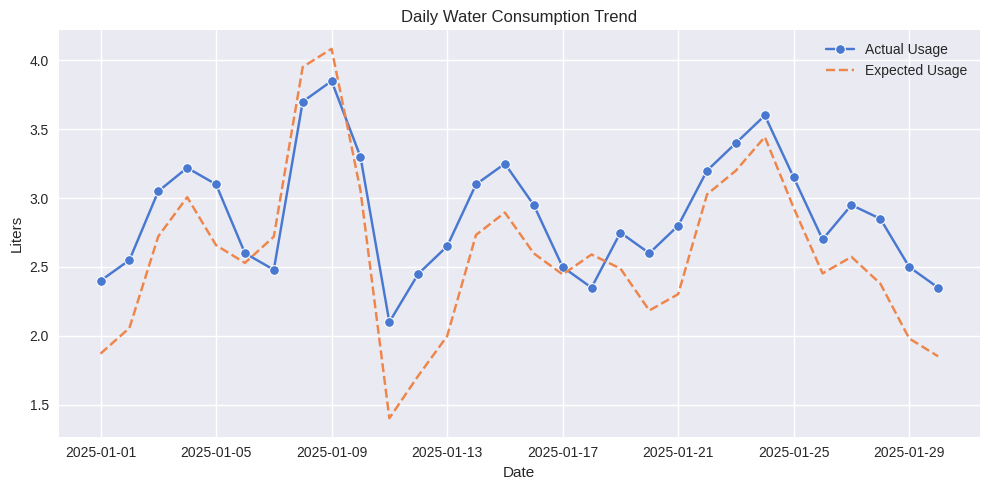

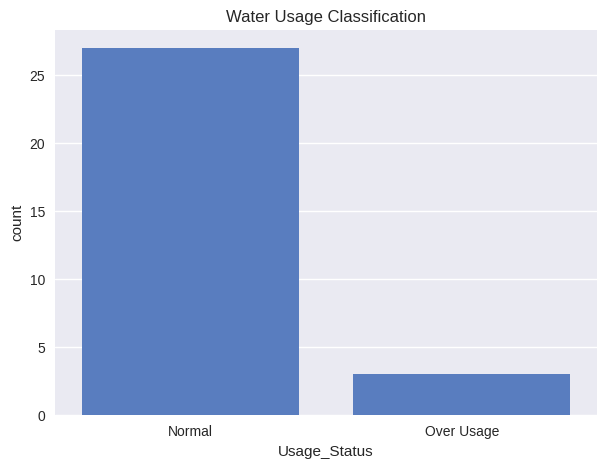

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Date", y="Water_Consumed_Liters", marker="o", label="Actual Usage")
sns.lineplot(data=df, x="Date", y="Expected_Water_L", linestyle="--", label="Expected Usage")
plt.title("Daily Water Consumption Trend")
plt.ylabel("Liters")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(x="Usage_Status", data=df)
plt.title("Water Usage Classification")
plt.show()

In [15]:
print("\nAnalysis Complete ")

usage_counts = df['Usage_Status'].value_counts()



Analysis Complete 


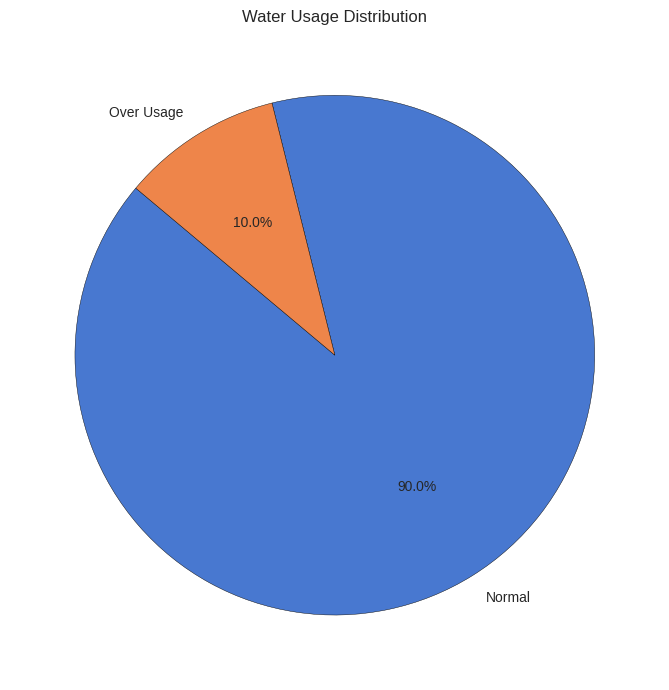

In [16]:
plt.figure(figsize=(7,7))
plt.pie(
    usage_counts,
    labels=usage_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Water Usage Distribution")
plt.tight_layout()
plt.show()
